In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error,r2_score

In [63]:
df=pd.read_csv('Loan Prediction Dataset.csv')

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
col='LoanAmount'
df1=df.dropna(subset=[col],axis=0)

In [11]:
X=df1.drop(columns=[col],axis=1)
y=df1[col]

In [18]:
for col in df1.columns:
    if df1[col].dtype=='object':

        label=LabelEncoder()
        label.fit(X[col])
        X[col]=label.transform(X[col])



In [21]:
X=X.drop('Loan_ID',axis=1)

In [22]:
from lightgbm import LGBMRegressor
model=LGBMRegressor(use_missing=False)
model.fit(X,y)

LGBMRegressor(use_missing=False)

In [28]:
d={}
col='LoanAmount'


In [26]:
col

'Loan_Status'

In [29]:
d[col]=list(model.predict(X))

In [74]:
i=0
for val,d_val in zip(df[col],d[col]):
    if pd.isna(val):
        df.loc[i,col]=d_val
    i+=1

In [75]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            1
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

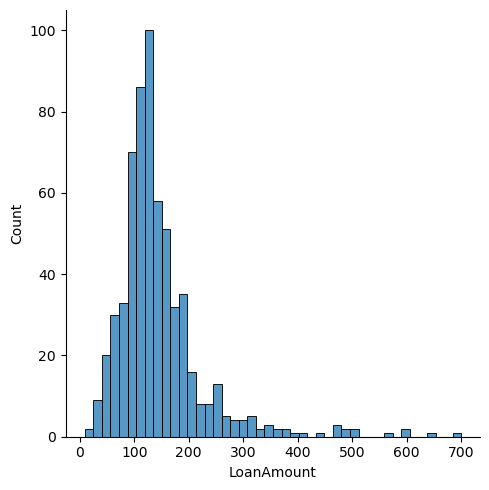

In [49]:
sns.displot(df['LoanAmount'])

In [50]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.502082,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [1]:
# sns.scatterplot(x=df[col].dropna(),y=d[col])

In [66]:
df[col].dropna()

1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 592, dtype: float64

In [61]:
d[col]

[144.50208203989436,
 63.08897531666504,
 121.16767848367523,
 151.6829452288832,
 246.42139331619384,
 103.75951681127259,
 148.4859877061141,
 157.13955581266697,
 342.58565134736995,
 92.32606808133703,
 116.92804324835684,
 208.039140353677,
 104.0935657139377,
 55.50082924769391,
 116.82858712936803,
 89.38797155072109,
 91.38237106736057,
 114.54288894860557,
 112.23324642703889,
 165.72438493132762,
 277.1783887972735,
 129.10840431601213,
 123.22887351750181,
 162.69610835182496,
 200.21789828984203,
 134.42392351096424,
 115.63299674120498,
 45.961286545182325,
 130.84207248050097,
 188.41703199556034,
 69.05529288165141,
 104.56551490125764,
 127.00719038634932,
 293.4876811033873,
 67.76842732362965,
 138.94337248196467,
 193.1416196075347,
 107.72005029982503,
 89.25656142844765,
 43.960361159546736,
 71.4390527805781,
 138.67182102243586,
 87.61258987197425,
 81.12209933300436,
 94.23687614790065,
 156.70169898050463,
 134.55603567546905,
 144.7419806674884,
 103.614476663

In [67]:
mean_absolute_error(df[col].dropna(),d[col])

25.346833404922226

In [68]:
r2_score(df[col].dropna(),d[col])

0.7322188084555152

<Axes: >

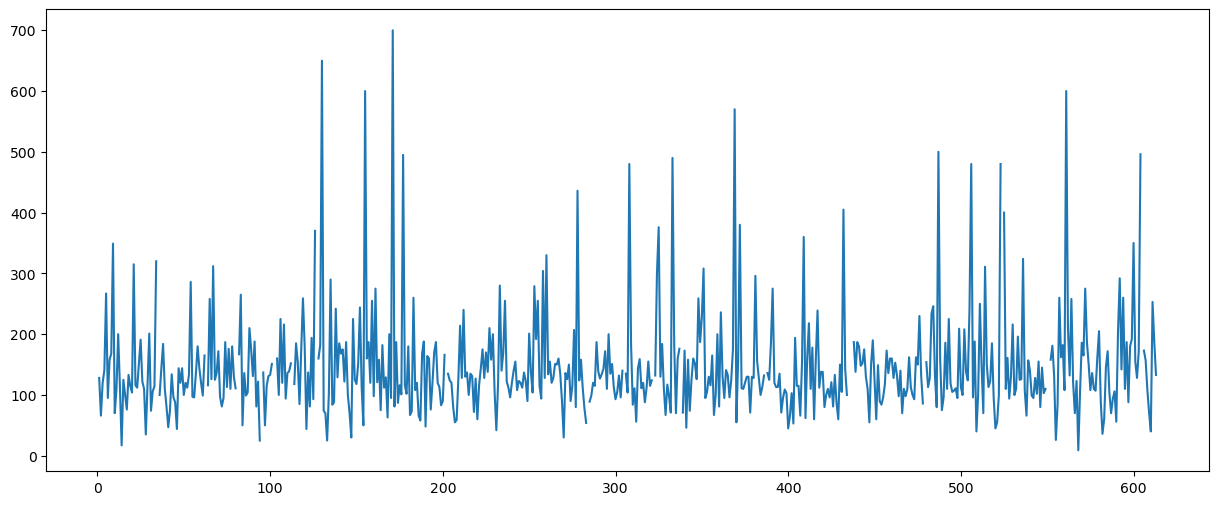

In [71]:
df[col].plot(figsize=(15,6))

<Axes: >

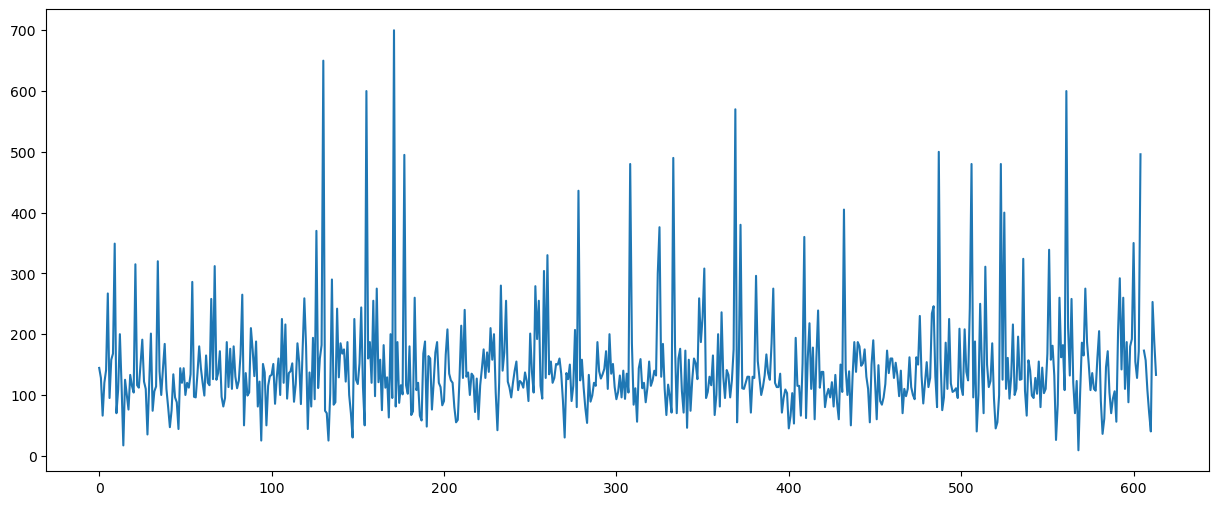

In [77]:
df[col].plot(figsize=(15,6))